# **THE SPARKS FOUNDATION - INTERNSHIP**

Graduate Rotational Internship Program

> ### **Data Science & Business Analytics**

This Notebook deals with the prediction of Iris dataset using Decision Tree Algorithm.

## **Task - 6 (Level - Intermediate)**


> ## **Predict Iris Data Using Decision Tree Algorithm** 
***
> ## Objective
* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 
***
> ## About The Data
* Iris data contains 150 rows and 6 columns including Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species. This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant (Iris-setosa, Iris-versicolor, and Iris-virginica).
* Data source: [Link](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view)
* Data Format: .csv

### **Intern - Swati Gulati**

### Supervised Learning

* In this, the machine learning algorithm learns from **labelled data.**
* **Labeled data** is a group of **samples that have been tagged with one or more labels.** Labeling typically takes a set of unlabeled data and augments each piece of it with informative tags. Labels can be obtained by asking humans to make judgments about a given piece of unlabeled data.

> There are two types of Supervised Learning:
1. **Classification -** It is about predicting a **class or discrete values.** Eg. Male or Female; True or False. Classes are sometimes called as target/labels or categories. This is a binary classification since there are only two class.
**Alogorithms -** *Decision Tree Classification, Random Forest Classification, K-nearest Neighbor*
2. **Regression -** It is about predicting **a quantity or continuous values.** Eg. Age; Salary; Price. *The ultimate goal of the regression algorithm is to plot a best-fit line or curve between the data.*
**Alogorithms -** *Logistic Regression, Polynomial Regression, Support Vector Machine (SVM)*

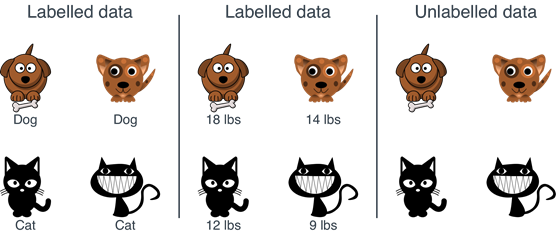

**Decision Tree Algorithm**

* Decision Trees (DTs) are a **non-parametric supervised learning method used for classification and regression.** 
* The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 
* A tree can be seen as a piecewise constant approximation.

**Python Vs IPython**


* **Python** - It is a general-purpose programming language.


***


* **IPython** - It is an interactive command-line terminal for Python. IPython can interactively manage parallel computing clusters using asynchronous status callbacks and/or MPI. 
* IPython can also be used as a system shell replacement. 
* Its default behavior is largely similar to Unix shells, but it allows customization and the flexibility of executing code in a live Python environment.

In [29]:
# Import required libraries
import pandas as pd
import numpy as np
import sklearn.datasets as datasets                       # Import Iris dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split      # Split the data into train & test
from sklearn.tree import DecisionTreeClassifier           # Decision Tree Algorithm
from sklearn.externals.six import StringIO                # StringIo
from IPython.display import Image  
from sklearn.tree import export_graphviz                  # export_graphviz
import pydotplus                                          # PyDotPlus is an improved version of the old pydot project that provides a Python Interface to Graphviz's Dot language.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


1. Data Collection & Pre-Processing

In [30]:
# Read/Load the data
iris = datasets.load_iris()

In [31]:
# View data (First 5 and last 5 rows)
# Forming the iris dataframe
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


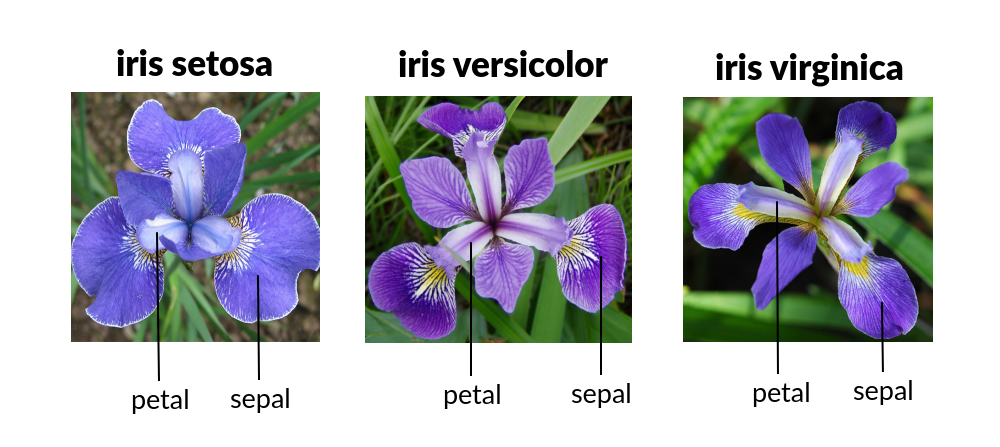

In [32]:
# View rows and columns
data.shape

(150, 4)

In [33]:
# Getting some basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Data does not contain any missing values.

In [34]:
# Getting statistical measures of the data
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Correlation

In [35]:
correlation = data.corr()

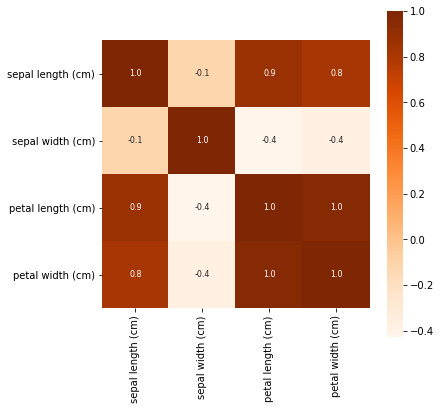

In [36]:
#Constructing a heatmap to understand the values
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, fmt='.1f', cbar=True, square=True, annot=True,  cmap='Oranges', annot_kws={'size':8})

Conclusion:

* PetalLengthCm & PetalWidthCm are highly (strongly) correlated to each other -> 1.0
* SepalLengthCm is positively correlated to PetalLengthCm & PetalWidthCm -> 0.9 & 0.8 resp.
* SepalLengthCm & SepalWidthCm are negatively correlated to each other -> -0.1
* SepalWidthCm is highly negatively correlated to PetalLengthCm & PetalWidthCm -> -0.4

In [37]:
# from pandas_profiling import ProfileReport      (Generate EDA Report)
# profile= ProfileReport(data)
# profile.to_file(output_file="Iris-data.html")

In [38]:
y=iris.target       # 3 -> 0, 1, 2 (50, 50, 50)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


2. Decision Tree Algorithm

* The decision tree algorithm can be used for solving regression and classification problems too.
* The data set contains information of 3 classes of the iris plant with the following attributes - SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.

In [39]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(data,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


Let us visualize the Decision Tree to understand it better.

In [40]:
# Install required libraries
# !pip install pydotplus                  # PyDotPlus is an improved version of the old pydot project that provides a Python Interface to Graphviz’s Dot language.
# Graphviz (short for Graph Visualization Software) is a package of open-source tools initiated by AT&T Labs Research for drawing graphs specified in DOT language scripts having the file name extension "gv". It also provides libraries for software applications to use the tools. Graphviz is free software licensed under the Eclipse Public License.
# !apt-get install graphviz -y

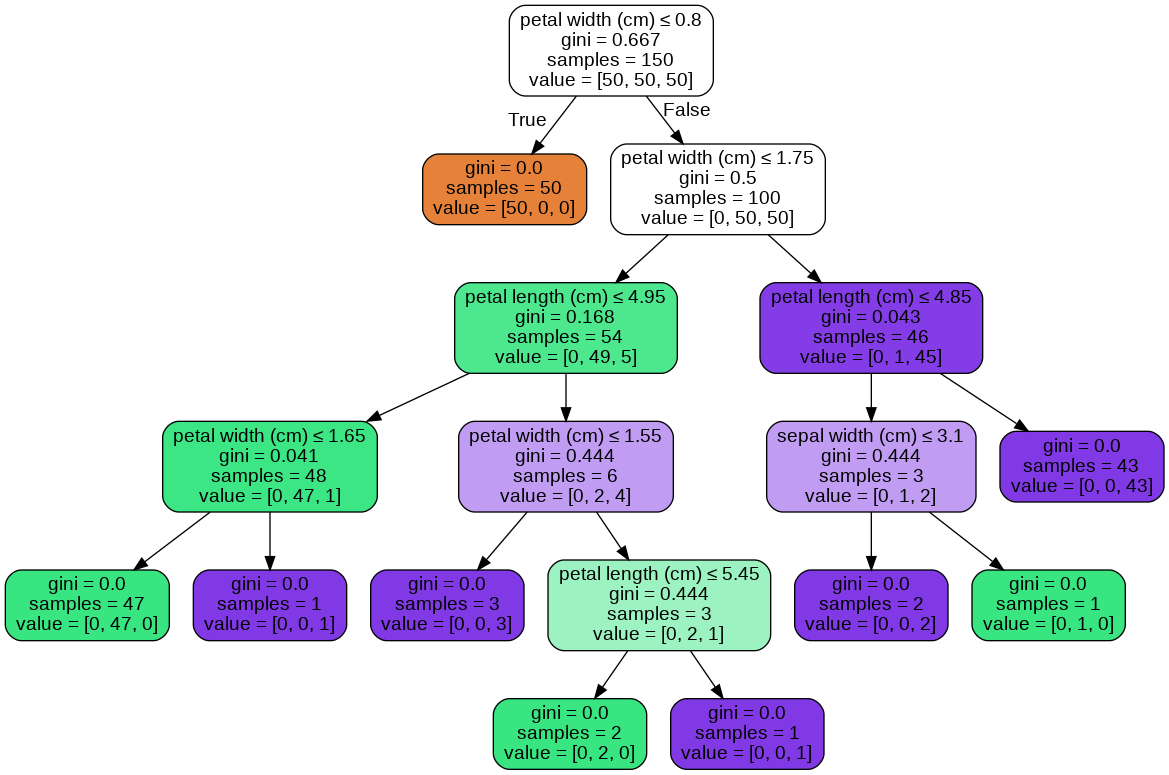

In [41]:
# Visualize the graph

# StringIO module is an in-memory file-like object. This object can be used as input or output to the most function that would expect a standard file object. When the StringIO object is created it is initialized by passing a string to the constructer.
dot_data = StringIO()

# export_graphviz - Export a decision tree in DOT format. It generates a GraphViz representation of the decision tree, which is then written into 'out_file'. Once exported, graphical renderings can be generated.
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())